# Pre-processing and Features Selection

## 1. Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
file_path = '/home/diego_nbotelho/code/diegonbotelho/f1-tire-prediction/raw_data/df_all_races.csv'
all_races_df = pd.read_csv(file_path)

In [3]:
pd.set_option('display.max_columns', None)
all_races_df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Event_Year,GrandPrix,Delta_Lap
0,0 days 01:04:15.340000,VER,1,100.236,1.0,1.0,NaN,NaN,NaN,42.325,24.389,NaN,3831.046,3855.427,230.0,254.0,274.0,250.0,False,SOFT,4.0,False,Red Bull Racing,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,2.0,False,NaN,False,False,23.9,25.0,1010.2,False,29.1,20,0.5,2022,Bahrain,0.000
1,0 days 01:05:53.220000,VER,1,97.880,2.0,1.0,NaN,NaN,31.285,42.269,24.326,3886.662,3928.931,3953.257,NaN,252.0,276.0,296.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:04:15.340000,2022-03-20 15:05:15.357,1,2.0,False,NaN,False,True,23.8,26.0,1010.4,False,29.0,357,0.5,2022,Bahrain,-2.356
2,0 days 01:07:31.577000,VER,1,98.357,3.0,1.0,NaN,NaN,31.499,42.474,24.384,3984.756,4027.230,4051.614,229.0,254.0,276.0,294.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:05:53.220000,2022-03-20 15:06:53.237,1,2.0,False,NaN,False,True,23.8,27.0,1010.4,False,29.0,12,0.5,2022,Bahrain,0.477
3,0 days 01:09:10.143000,VER,1,98.566,4.0,1.0,NaN,NaN,31.342,42.674,24.550,4082.956,4125.630,4150.180,231.0,250.0,276.0,297.0,False,SOFT,7.0,False,Red Bull Racing,0 days 01:07:31.577000,2022-03-20 15:08:31.594,1,2.0,False,NaN,False,True,23.8,29.0,1010.4,False,28.7,12,0.4,2022,Bahrain,0.209
4,0 days 01:10:49.020000,VER,1,98.877,5.0,1.0,NaN,NaN,31.498,42.854,24.525,4181.678,4224.532,4249.057,229.0,256.0,276.0,293.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:09:10.143000,2022-03-20 15:10:10.160,1,2.0,False,NaN,False,True,23.8,33.0,1010.4,False,28.5,316,0.4,2022,Bahrain,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67074,0 days 02:18:53.038000,PIA,81,87.731,54.0,3.0,NaN,NaN,17.591,38.078,32.062,8262.900,8300.978,8333.040,NaN,293.0,215.0,304.0,False,HARD,22.0,True,McLaren,0 days 02:17:25.307000,2024-12-08 14:24:12.524,1,10.0,False,NaN,False,True,25.9,60.0,1017.8,False,29.3,109,2.0,2024,Abu Dhabi,-0.437
67075,0 days 02:20:20.819000,PIA,81,87.781,55.0,3.0,NaN,NaN,17.639,38.014,32.128,8350.679,8388.693,8420.821,290.0,295.0,214.0,307.0,False,HARD,23.0,True,McLaren,0 days 02:18:53.038000,2024-12-08 14:25:40.255,1,10.0,False,NaN,False,True,25.9,60.0,1017.9,False,29.3,117,3.2,2024,Abu Dhabi,0.050
67076,0 days 02:21:48.635000,PIA,81,87.816,56.0,3.0,NaN,NaN,17.603,38.000,32.213,8438.424,8476.424,8508.637,293.0,296.0,214.0,309.0,False,HARD,24.0,True,McLaren,0 days 02:20:20.819000,2024-12-08 14:27:08.036,1,10.0,False,NaN,False,True,25.9,60.0,1018.0,False,29.4,110,2.1,2024,Abu Dhabi,0.035
67077,0 days 02:23:17.189000,PIA,81,88.554,57.0,3.0,NaN,NaN,17.650,38.546,32.358,8526.287,8564.833,8597.191,295.0,306.0,213.0,310.0,False,HARD,25.0,True,McLaren,0 days 02:21:48.635000,2024-12-08 14:28:35.852,12,10.0,False,NaN,False,True,25.9,60.0,1018.0,False,29.4,104,2.4,2024,Abu Dhabi,0.738


In [4]:
# Display basic info
print("Dataset shape:", all_races_df.shape)

Dataset shape: (67079, 41)


In [5]:
# Missing Data Analysis
print("Missing data per column:")
print(all_races_df.isnull().sum())

Missing data per column:
Time                      0
Driver                    0
DriverNumber              0
LapTime                1004
LapNumber                 0
Stint                     0
PitOutTime            64732
PitInTime             64708
Sector1Time            1437
Sector2Time             122
Sector3Time             230
Sector1SessionTime     1598
Sector2SessionTime      122
Sector3SessionTime      230
SpeedI1               10095
SpeedI2                 119
SpeedFL                2483
SpeedST                6014
IsPersonalBest           80
Compound                  0
TyreLife                  0
FreshTyre                 0
Team                      0
LapStartTime              0
LapStartDate             80
TrackStatus               0
Position                109
Deleted                   0
DeletedReason         66192
FastF1Generated           0
IsAccurate                0
AirTemp                   0
Humidity                  0
Pressure                  0
Rainfall               

In [6]:
# Exclusion of features that are not necessary
columns_to_remove = [
    'Time',
    'DriverNumber',
    'PitOutTime',
    'PitInTime',
    'Sector1SessionTime',
    'Sector2SessionTime',
    'Sector3SessionTime',
    'SpeedI1',
    'SpeedI2',
    'SpeedFL',
    'SpeedST',
    'IsPersonalBest',
    'FreshTyre',
    'Team',
    'LapStartTime',
    'LapStartDate',
    'Deleted',
    'DeletedReason',
    'FastF1Generated',
    'IsAccurate',
    'WindDirection',
    'WindSpeed',
    'TrackStatus',
    'Event_Year'
]

new_df = all_races_df.drop(columns=columns_to_remove)
new_df.head(1)

,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Position,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,GrandPrix,Delta_Lap
0,VER,100.236,1.0,1.0,NaN,42.325,24.389,SOFT,4.0,2.0,23.9,25.0,1010.2,False,29.1,Bahrain,0.0


In [7]:
# Display basic info
print("Dataset shape:", new_df.shape)

Dataset shape: (67079, 17)


In [8]:
# Missing Data Analysis
print("Missing data per column:")
print(new_df.isnull().sum())

Missing data per column:
Driver            0
LapTime        1004
LapNumber         0
Stint             0
Sector1Time    1437
Sector2Time     122
Sector3Time     230
Compound          0
TyreLife          0
Position        109
AirTemp           0
Humidity          0
Pressure          0
Rainfall          0
TrackTemp         0
GrandPrix         0
Delta_Lap         0
dtype: int64


In [13]:
new_df = new_df.dropna(subset=['Position'])

In [14]:
# Missing Data Analysis
print("Missing data per column:")
print(new_df.isnull().sum())

Missing data per column:
Driver            0
LapTime         895
LapNumber         0
Stint             0
Sector1Time    1328
Sector2Time      13
Sector3Time     121
Compound          0
TyreLife          0
Position          0
AirTemp           0
Humidity          0
Pressure          0
Rainfall          0
TrackTemp         0
GrandPrix         0
Delta_Lap         0
dtype: int64


In [15]:
# Verify duplicates
print("\nNumber of duplicates:")
print(new_df.duplicated().sum())


Number of duplicates:
0


In [18]:
# Strategy for missing values

# Fill null values in numeric columns with the median
numerical_columns = new_df.select_dtypes(include=[np.number]).columns
new_df.loc[:, numerical_columns] = new_df[numerical_columns].fillna(new_df[numerical_columns].median())

# Verify missing values after treatment
print("\nMissing values after treatment:")
print(new_df.isnull().sum())


Missing values after treatment:
Driver         0
LapTime        0
LapNumber      0
Stint          0
Sector1Time    0
Sector2Time    0
Sector3Time    0
Compound       0
TyreLife       0
Position       0
AirTemp        0
Humidity       0
Pressure       0
Rainfall       0
TrackTemp      0
GrandPrix      0
Delta_Lap      0
dtype: int64


In [20]:
new_df['Compound'].value_counts()

Compound
HARD            29837
MEDIUM          23344
SOFT             8669
INTERMEDIATE     4903
WET               217
Name: count, dtype: int64

## 2. Scale the features

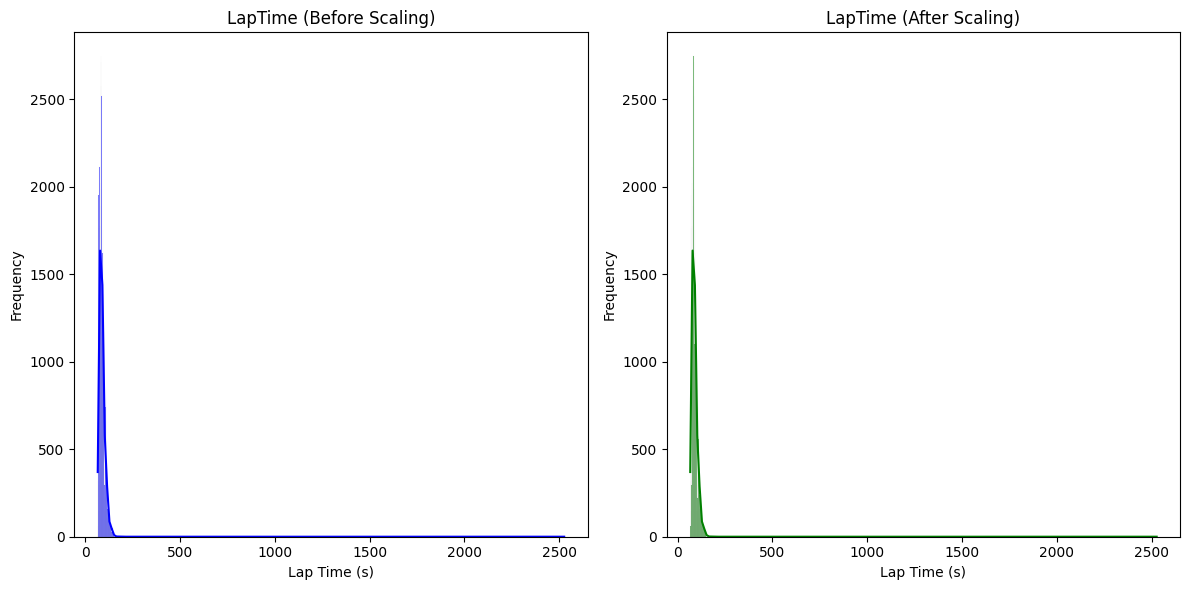

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of a numerical feature before scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_df['LapTime'], kde=True, color='blue')
plt.title('LapTime (Before Scaling)')
plt.xlabel('Lap Time (s)')
plt.ylabel('Frequency')

# Plot the distribution after scaling
plt.subplot(1, 2, 2)
sns.histplot(new_df['LapTime'], kde=True, color='green')
plt.title('LapTime (After Scaling)')
plt.xlabel('Lap Time (s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
scaled_features = scaler.fit_transform(new_df[numerical_columns])

# Convert the scaled features to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numerical_columns)

# Replace the original numerical columns with the scaled ones
new_df[numerical_columns] = scaled_df

new_df.head()

## 3. Encode features (OneHotEnconder)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Driver', 'Compound', 'GrandPrix']

# Apply One-Hot Encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(new_df[categorical_columns])

# Get the names of the encoded columns
encoded_column_names = one_hot_encoder.get_feature_names_out(categorical_columns)

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names, dtype=int)

# Concatenate the encoded features with the original dataframe
new_df = pd.concat([new_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop the original categorical columns
new_df = new_df.drop(columns=categorical_columns)

new_df.head()